In [20]:
import pandas as pd

import numpy as np
import matplotlib
#matplotlib.use('tkAgg')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sbn
import datetime as dt
import cufflinks as cf
import plotly as py
from pandas_profiling import ProfileReport
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

# Leemos el archivo csv y creamos nuestra base de datos

In [3]:
datos=pd.read_csv('210307COVID19MEXICO.csv',low_memory=False,encoding='latin-1').sample(frac=.05)

datos.to_csv('210307COVID19MEXICO_SAMPLE.csv')

In [12]:
df=pd.read_csv('210307COVID19MEXICO_SAMPLE.csv',low_memory=False,encoding='latin-1')
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2021-03-07,18a637,2,12,10,1,10,10,12,1,...,2,1,1,2,97,3,99,MÃÂ©xico,97,97
1,2021-03-07,3f3f88,2,12,16,2,16,16,113,1,...,1,1,1,2,97,3,99,MÃÂ©xico,97,97
2,2021-03-07,0e3d43,2,12,24,2,24,24,28,1,...,1,1,1,2,97,3,99,MÃÂ©xico,97,97
3,2021-03-07,17b71a,2,12,15,2,15,15,106,1,...,1,1,4,2,97,5,99,MÃÂ©xico,97,97
4,2021-03-07,30192b,2,4,9,2,9,9,7,1,...,1,1,4,2,97,5,99,MÃÂ©xico,97,97


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280983 entries, 0 to 280982
Data columns (total 40 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   FECHA_ACTUALIZACION    280983 non-null  object
 1   ID_REGISTRO            280983 non-null  object
 2   ORIGEN                 280983 non-null  int64 
 3   SECTOR                 280983 non-null  int64 
 4   ENTIDAD_UM             280983 non-null  int64 
 5   SEXO                   280983 non-null  int64 
 6   ENTIDAD_NAC            280983 non-null  int64 
 7   ENTIDAD_RES            280983 non-null  int64 
 8   MUNICIPIO_RES          280983 non-null  int64 
 9   TIPO_PACIENTE          280983 non-null  int64 
 10  FECHA_INGRESO          280983 non-null  object
 11  FECHA_SINTOMAS         280983 non-null  object
 12  FECHA_DEF              280983 non-null  object
 13  INTUBADO               280983 non-null  int64 
 14  NEUMONIA               280983 non-null  int64 
 15  

# El análisis consistirá en revisar las comorbilidades de los infectados confirmados por COVID-19
### Se toma de las columnas RESULTADO_ANTIGENO y CLASIFICACION_FINAL los valores 1 y 3

In [14]:
anio_malo = {'9999-99-99':'1900-1-1'}

In [15]:
df['fecha_muerto']=df.FECHA_DEF.replace(anio_malo)

In [16]:
df['fecha_muerte']=pd.to_datetime(df.fecha_muerto)
df["año"] = df.fecha_muerte.dt.year
dict_month = {1:'Enero',2:'Febrero',3:'Marzo',4:'Abril',5:'Mayo',6:'Junio',7:'Julio',
             8:'Agosto',9:'Septiembre',10:'Octubre',11:'Noviembre',12:'Diciembre'}
df["mes"] = df.fecha_muerte.dt.month.map(dict_month)
df['dia']=df.fecha_muerte.dt.day


In [17]:
df['muerto']=np.where(df.año==1900,0,1)
df.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,fecha_muerto,fecha_muerte,año,mes,dia,muerto
0,2021-03-07,18a637,2,12,10,1,10,10,12,1,...,99,MÃÂ©xico,97,97,1900-1-1,1900-01-01,1900,Enero,1,0
1,2021-03-07,3f3f88,2,12,16,2,16,16,113,1,...,99,MÃÂ©xico,97,97,1900-1-1,1900-01-01,1900,Enero,1,0
2,2021-03-07,0e3d43,2,12,24,2,24,24,28,1,...,99,MÃÂ©xico,97,97,1900-1-1,1900-01-01,1900,Enero,1,0
3,2021-03-07,17b71a,2,12,15,2,15,15,106,1,...,99,MÃÂ©xico,97,97,1900-1-1,1900-01-01,1900,Enero,1,0
4,2021-03-07,30192b,2,4,9,2,9,9,7,1,...,99,MÃÂ©xico,97,97,1900-1-1,1900-01-01,1900,Enero,1,0


In [18]:
df.EDAD.describe()

count    280983.000000
mean         41.151176
std          16.854075
min           0.000000
25%          29.000000
50%          40.000000
75%          52.000000
max         119.000000
Name: EDAD, dtype: float64

In [23]:
df['Rango_Edad']=pd.cut(df.EDAD,[0,20,40,60,80,100,120])

In [24]:
cantidad_muertos = df.groupby('CLASIFICACION_FINAL')['muerto'].value_counts(normalize=True).unstack()
cantidad_muertos

muerto,0,1
CLASIFICACION_FINAL,,
1,0.952398,0.047602
2,NaN,1.000000
3,0.909891,0.090109
4,0.969643,0.030357
5,0.959148,0.040852
6,0.950964,0.049036
7,0.985619,0.014381


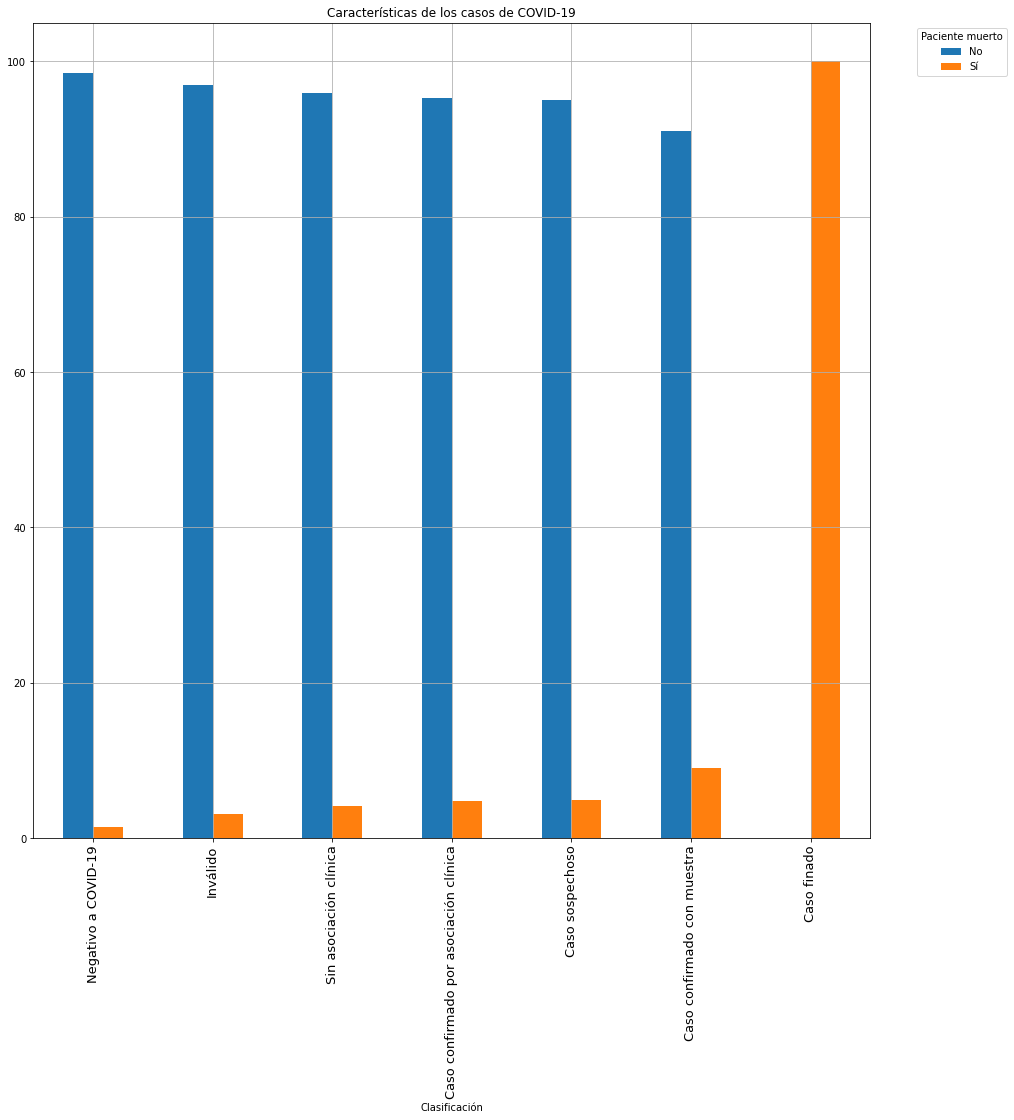

In [25]:
a=cantidad_muertos.sort_values(by=0,ascending=False)*100
a.plot.bar(rot=90,figsize=(15,15))
plt.title('Características de los casos de COVID-19')
plt.legend(['No','Sí'],title='Paciente muerto',bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xticks(np.arange(7), ('Negativo a COVID-19','Inválido','Sin asociación clínica','Caso confirmado por asociación clínica',
                          'Caso sospechoso','Caso confirmado con muestra','Caso finado'),  fontsize = 13)
plt.xlabel('Clasificación')
plt.grid(True)
plt.show();

# Se generan las claves municipales de acuerdo a INEGI

### Primero creamos la clave estatal y luego la clave municipal

In [26]:
def clave_estatal(data):
    estado=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,
            16,17,18,19,20,21,22,23,24,
            25,26,27,28,29,30,31,32]
    nuevo_estado=[]
    for k in data['ENTIDAD_RES']:
        if k in estado:
            if k < 10:
                nuevo_estado.append('0'+str(k))
            elif k > 9:
                nuevo_estado.append(str(k))
    return nuevo_estado
    

In [27]:
df.insert(0,'nuevo_estado_1',clave_estatal(df))
df.head()

,nuevo_estado_1,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,...,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,fecha_muerto,fecha_muerte,año,mes,dia,muerto,Rango_Edad
0,10,2021-03-07,18a637,2,12,10,1,10,10,12,...,MÃÂ©xico,97,97,1900-1-1,1900-01-01,1900,Enero,1,0,"(40, 60]"
1,16,2021-03-07,3f3f88,2,12,16,2,16,16,113,...,MÃÂ©xico,97,97,1900-1-1,1900-01-01,1900,Enero,1,0,"(40, 60]"
2,24,2021-03-07,0e3d43,2,12,24,2,24,24,28,...,MÃÂ©xico,97,97,1900-1-1,1900-01-01,1900,Enero,1,0,"(20, 40]"
3,15,2021-03-07,17b71a,2,12,15,2,15,15,106,...,MÃÂ©xico,97,97,1900-1-1,1900-01-01,1900,Enero,1,0,"(40, 60]"
4,09,2021-03-07,30192b,2,4,9,2,9,9,7,...,MÃÂ©xico,97,97,1900-1-1,1900-01-01,1900,Enero,1,0,"(20, 40]"


In [28]:
def clave_municipal(data):
    cve_municipal = [x for x in data['MUNICIPIO_RES']]
    nuevo_municipio = []
    for k in data['MUNICIPIO_RES']:
        if k in cve_municipal:
            if k > 9 and k <100:
                nuevo_municipio.append('0'+str(k))
            elif k < 10:
                nuevo_municipio.append('00'+str(k))
            else:
                nuevo_municipio.append(str(k))
            
    return nuevo_municipio

In [29]:
municipios=clave_municipal(df)

In [30]:
df['nuevo_mun']=municipios
df.head()

,nuevo_estado_1,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,...,PAIS_ORIGEN,UCI,fecha_muerto,fecha_muerte,año,mes,dia,muerto,Rango_Edad,nuevo_mun
0,10,2021-03-07,18a637,2,12,10,1,10,10,12,...,97,97,1900-1-1,1900-01-01,1900,Enero,1,0,"(40, 60]",012
1,16,2021-03-07,3f3f88,2,12,16,2,16,16,113,...,97,97,1900-1-1,1900-01-01,1900,Enero,1,0,"(40, 60]",113
2,24,2021-03-07,0e3d43,2,12,24,2,24,24,28,...,97,97,1900-1-1,1900-01-01,1900,Enero,1,0,"(20, 40]",028
3,15,2021-03-07,17b71a,2,12,15,2,15,15,106,...,97,97,1900-1-1,1900-01-01,1900,Enero,1,0,"(40, 60]",106
4,09,2021-03-07,30192b,2,4,9,2,9,9,7,...,97,97,1900-1-1,1900-01-01,1900,Enero,1,0,"(20, 40]",007


In [31]:
df['CVE']=df['nuevo_estado_1'].astype('str')+df['nuevo_mun'].astype('str')
df.head()

,nuevo_estado_1,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,...,UCI,fecha_muerto,fecha_muerte,año,mes,dia,muerto,Rango_Edad,nuevo_mun,CVE
0,10,2021-03-07,18a637,2,12,10,1,10,10,12,...,97,1900-1-1,1900-01-01,1900,Enero,1,0,"(40, 60]",012,10012
1,16,2021-03-07,3f3f88,2,12,16,2,16,16,113,...,97,1900-1-1,1900-01-01,1900,Enero,1,0,"(40, 60]",113,16113
2,24,2021-03-07,0e3d43,2,12,24,2,24,24,28,...,97,1900-1-1,1900-01-01,1900,Enero,1,0,"(20, 40]",028,24028
3,15,2021-03-07,17b71a,2,12,15,2,15,15,106,...,97,1900-1-1,1900-01-01,1900,Enero,1,0,"(40, 60]",106,15106
4,09,2021-03-07,30192b,2,4,9,2,9,9,7,...,97,1900-1-1,1900-01-01,1900,Enero,1,0,"(20, 40]",007,09007


# Para saber el nombre de cada municipio utilizaré los tabulados del SAIC de INEGI

In [32]:
censo = pd.read_csv('saic_inegi.csv',skiprows=4,encoding='latin-1',low_memory=False)
censo.head()

,AÃ±o Censal,Entidad,Municipio,Actividad econÃ³mica,UE Unidades econÃ³micas,Unnamed: 5,Unnamed: 6
0,2018,01 Aguascalientes,001 Aguascalientes,Total municipal,40547,NaN,NaN
1,2018,01 Aguascalientes,002 Asientos,Total municipal,845,NaN,NaN
2,2018,01 Aguascalientes,003 Calvillo,Total municipal,2038,NaN,NaN
3,2018,01 Aguascalientes,004 CosÃ­o,Total municipal,334,NaN,NaN
4,2018,01 Aguascalientes,005 JesÃºs MarÃ­a,Total municipal,4197,NaN,NaN


In [33]:
censo.drop(['Unnamed: 5','Unnamed: 6'],axis=1,inplace=True)
censo.head()

,AÃ±o Censal,Entidad,Municipio,Actividad econÃ³mica,UE Unidades econÃ³micas
0,2018,01 Aguascalientes,001 Aguascalientes,Total municipal,40547
1,2018,01 Aguascalientes,002 Asientos,Total municipal,845
2,2018,01 Aguascalientes,003 Calvillo,Total municipal,2038
3,2018,01 Aguascalientes,004 CosÃ­o,Total municipal,334
4,2018,01 Aguascalientes,005 JesÃºs MarÃ­a,Total municipal,4197


In [34]:
censo.columns = ['Año','Entidad','Municipio','Actividad','UE']
censo

,Año,Entidad,Municipio,Actividad,UE
0,2018,01 Aguascalientes,001 Aguascalientes,Total municipal,40547
1,2018,01 Aguascalientes,002 Asientos,Total municipal,845
2,2018,01 Aguascalientes,003 Calvillo,Total municipal,2038
3,2018,01 Aguascalientes,004 CosÃ­o,Total municipal,334
4,2018,01 Aguascalientes,005 JesÃºs MarÃ­a,Total municipal,4197
...,...,...,...,...,...
2460,2018,32 Zacatecas,054 Villa Hidalgo,Total municipal,357
2461,2018,32 Zacatecas,055 Villanueva,Total municipal,1394
2462,2018,32 Zacatecas,056 Zacatecas,Total municipal,7641
2463,2018,32 Zacatecas,057 Trancoso,Total municipal,561


In [35]:
censo['cve_estatal']=censo['Entidad'].str.split(' ').str.get(0)


In [36]:
censo['cve_municipal']=censo['Municipio'].str.split(' ').str.get(0)

In [37]:
censo['CVE']= censo['cve_estatal'].astype('str') + censo['cve_municipal'].astype('str')
censo['municipio_nombre']=censo['Municipio'].str[:].str.split(n=1).str.get(1)
censo=censo[:2465]

In [38]:
censo['Estado'] = censo['Entidad'].str[:].str.split(n=1).str.get(1)

In [39]:
cve = [x for x in censo['CVE']]
mun = [x for x in censo['municipio_nombre']]
ent = [x for x in censo['cve_estatal']]
estado = [x for x in censo['Estado']]

In [40]:
municipios_final = dict(zip(cve,mun))
estados = dict(zip(ent,estado))

In [41]:
df['Municipios'] = df['CVE'].replace(municipios_final)
df['Estados'] = df['nuevo_estado_1'].replace(estados)
df.head()

,nuevo_estado_1,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,...,fecha_muerte,año,mes,dia,muerto,Rango_Edad,nuevo_mun,CVE,Municipios,Estados
0,10,2021-03-07,18a637,2,12,10,1,10,10,12,...,1900-01-01,1900,Enero,1,0,"(40, 60]",012,10012,Lerdo,Durango
1,16,2021-03-07,3f3f88,2,12,16,2,16,16,113,...,1900-01-01,1900,Enero,1,0,"(40, 60]",113,16113,JosÃ© Sixto Verduzco,MichoacÃ¡n de Ocampo
2,24,2021-03-07,0e3d43,2,12,24,2,24,24,28,...,1900-01-01,1900,Enero,1,0,"(20, 40]",028,24028,San Luis PotosÃ­,San Luis PotosÃ­
3,15,2021-03-07,17b71a,2,12,15,2,15,15,106,...,1900-01-01,1900,Enero,1,0,"(40, 60]",106,15106,Toluca,MÃ©xico
4,09,2021-03-07,30192b,2,4,9,2,9,9,7,...,1900-01-01,1900,Enero,1,0,"(20, 40]",007,09007,Iztapalapa,Ciudad de MÃ©xico


# Una vez unidas las bases, pasamos al Análisis Estadístico Exploratorio

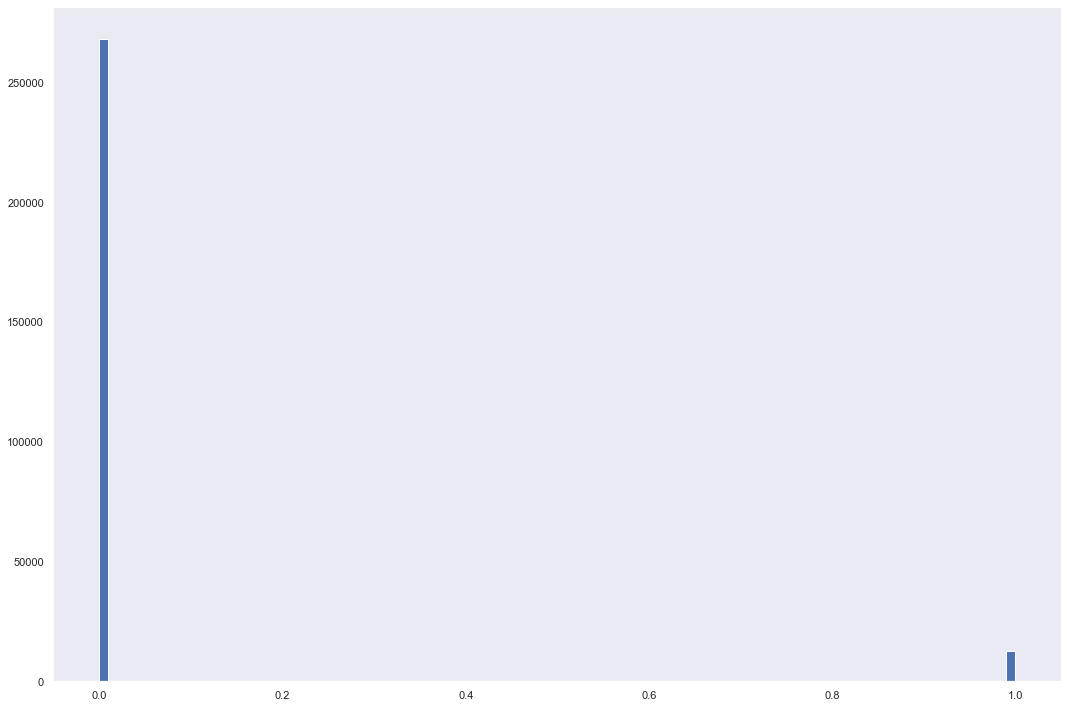

In [42]:
sbn.set()
df.muerto.hist(bins=100, figsize=(15,10), grid=False)  # Histogramas del conjunto de datos
plt.tight_layout();               # Ajusta automaticamente el padding

In [43]:
df.describe()

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,INTUBADO,NEUMONIA,...,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,UCI,año,dia,muerto
count,280983.000000,280983.000000,280983.000000,280983.000000,280983.000000,280983.000000,280983.000000,280983.000000,280983.000000,280983.000000,...,280983.000000,280983.000000,280983.00000,280983.000000,280983.000000,280983.000000,280983.000000,280983.000000,280983.000000,280983.000000
mean,1.711819,9.472306,13.961749,1.481848,15.073442,14.298086,31.031518,1.118719,85.832591,2.226060,...,1.348320,34.873330,1.68218,66.728752,5.343946,98.611767,85.844172,1905.491834,1.676571,0.045665
std,0.452917,3.606943,7.662304,0.499671,9.494615,7.597089,43.200329,0.323458,30.622378,5.483571,...,0.476439,45.424175,0.46563,44.350299,1.969781,6.131582,30.601523,25.106230,3.622146,0.208757
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1900.000000,1.000000,0.000000
25%,1.000000,4.000000,9.000000,1.000000,9.000000,9.000000,7.000000,1.000000,97.000000,2.000000,...,1.000000,1.000000,1.00000,2.000000,3.000000,99.000000,97.000000,1900.000000,1.000000,0.000000
50%,2.000000,12.000000,10.000000,1.000000,13.000000,11.000000,15.000000,1.000000,97.000000,2.000000,...,1.000000,2.000000,2.00000,97.000000,7.000000,99.000000,97.000000,1900.000000,1.000000,0.000000
75%,2.000000,12.000000,19.000000,2.000000,20.000000,19.000000,38.000000,1.000000,97.000000,2.000000,...,2.000000,97.000000,2.00000,97.000000,7.000000,99.000000,97.000000,1900.000000,1.000000,0.000000
max,2.000000,13.000000,32.000000,2.000000,99.000000,32.000000,999.000000,2.000000,99.000000,99.000000,...,2.000000,97.000000,2.00000,97.000000,7.000000,99.000000,99.000000,2021.000000,31.000000,1.000000


In [44]:
df.columns

Index(['nuevo_estado_1', 'FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN',
       'SECTOR', 'ENTIDAD_UM', 'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES',
       'MUNICIPIO_RES', 'TIPO_PACIENTE', 'FECHA_INGRESO', 'FECHA_SINTOMAS',
       'FECHA_DEF', 'INTUBADO', 'NEUMONIA', 'EDAD', 'NACIONALIDAD', 'EMBARAZO',
       'HABLA_LENGUA_INDIG', 'INDIGENA', 'DIABETES', 'EPOC', 'ASMA',
       'INMUSUPR', 'HIPERTENSION', 'OTRA_COM', 'CARDIOVASCULAR', 'OBESIDAD',
       'RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO', 'TOMA_MUESTRA_LAB',
       'RESULTADO_LAB', 'TOMA_MUESTRA_ANTIGENO', 'RESULTADO_ANTIGENO',
       'CLASIFICACION_FINAL', 'MIGRANTE', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN',
       'UCI', 'fecha_muerto', 'fecha_muerte', 'año', 'mes', 'dia', 'muerto',
       'Rango_Edad', 'nuevo_mun', 'CVE', 'Municipios', 'Estados'],
      dtype='object')

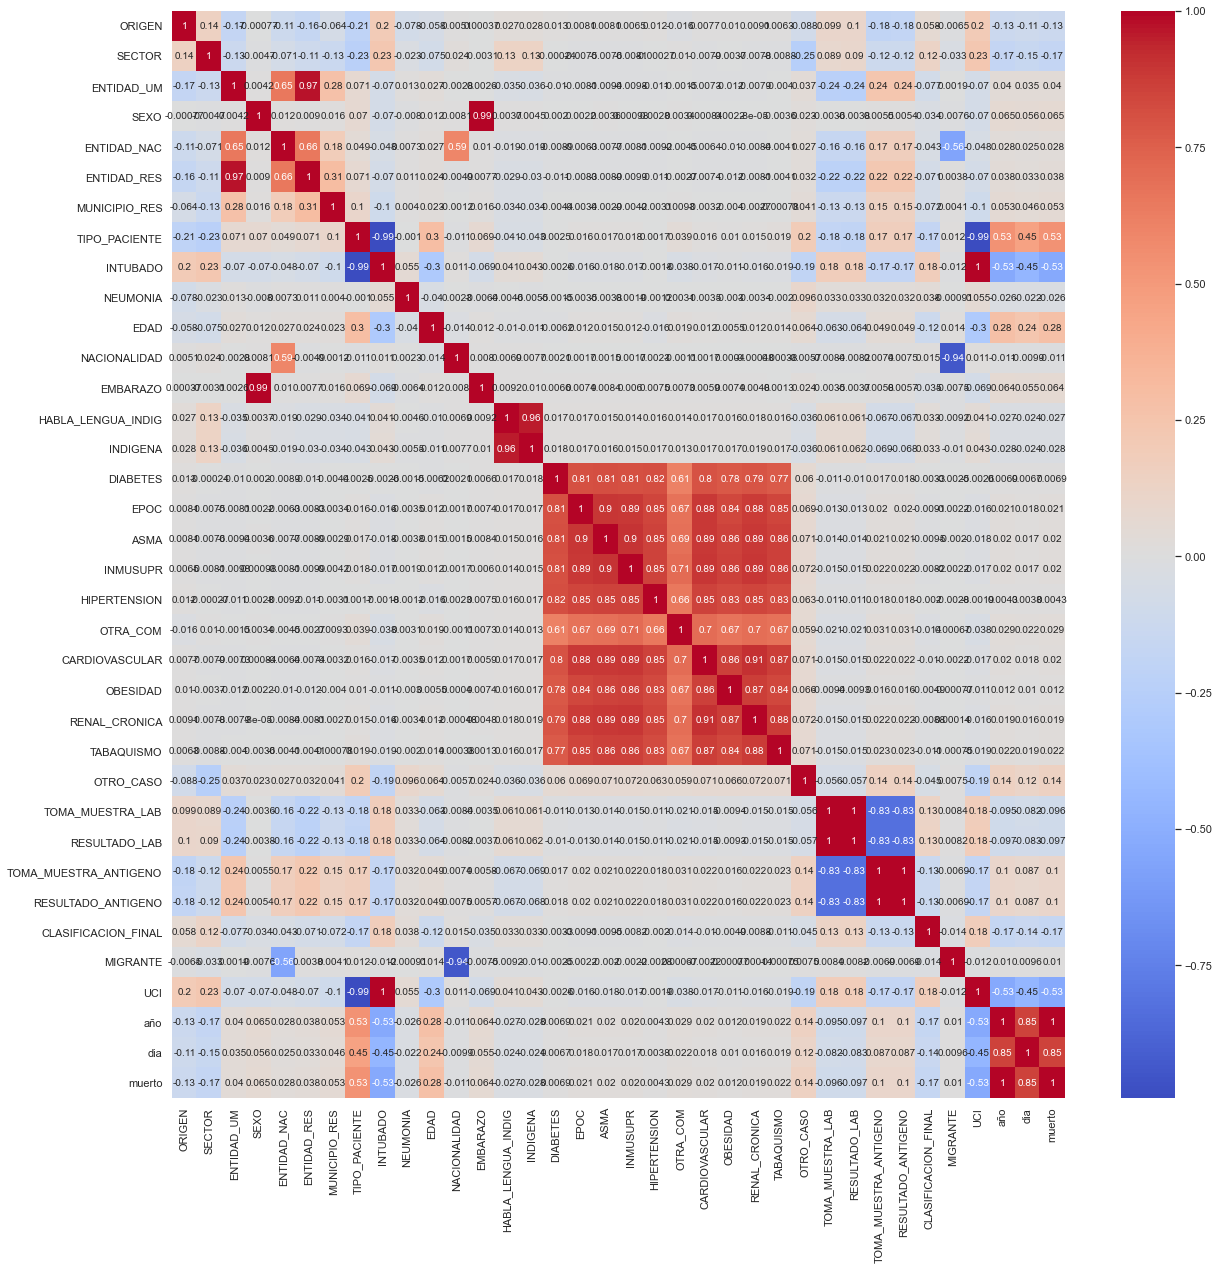

In [45]:
plt.figure(figsize=(20,20))
sbn.heatmap(df.corr(),cmap='coolwarm',annot=True, annot_kws={'fontsize':10});

In [46]:
df['SEXO'].value_counts(normalize = True)

1    0.518152
2    0.481848
Name: SEXO, dtype: float64

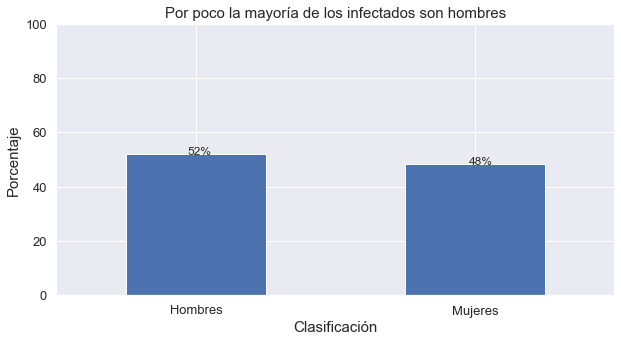

In [47]:
t = (df['SEXO'].value_counts(normalize = True))*100

pd.DataFrame(t).plot.bar(rot=0,figsize=(10,5))
plt.title('Por poco la mayoría de los infectados son hombres', fontsize = 15)
plt.ylabel('Porcentaje', fontsize = 15)
plt.xlabel('Clasificación', fontsize = 15)
plt.xticks(np.arange(2), ('Hombres', 'Mujeres'),  fontsize = 13)
plt.yticks(fontsize=13)
plt.text(0.977,48.11,'48%', fontsize = 12)
plt.text(-0.03,51.88,'52%', fontsize = 12)
plt.ylim(0,100)
plt.legend('', frameon = False)
plt.show();

In [56]:
df2=df[(df.RESULTADO_ANTIGENO==1) & (df.CLASIFICACION_FINAL==3)]

In [63]:
data=df2.groupby(['ENTIDAD_RES','CVE','Municipios','SEXO'])[['DIABETES','EPOC','ASMA','INMUSUPR','HIPERTENSION',
                                                     'CARDIOVASCULAR','OBESIDAD','TABAQUISMO','RENAL_CRONICA']].agg('sum').reset_index()

In [127]:
df.groupby(['ENTIDAD_RES','CVE','Municipios','SEXO','muerto'])[['INTUBADO', 'NEUMONIA', 'EDAD', 'NACIONALIDAD', 'EMBARAZO',
       'HABLA_LENGUA_INDIG', 'INDIGENA', 'DIABETES', 'EPOC', 'ASMA',
       'INMUSUPR', 'HIPERTENSION', 'OTRA_COM', 'CARDIOVASCULAR', 'OBESIDAD',
       'RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO', 'TOMA_MUESTRA_LAB',
       'RESULTADO_LAB', 'TOMA_MUESTRA_ANTIGENO', 'RESULTADO_ANTIGENO',
       'CLASIFICACION_FINAL',
       'UCI']].agg('sum').sort_values(by='CVE')

INTUBADO  NEUMONIA  \
ENTIDAD_RES CVE   Municipios             SEXO muerto                       
1           01001 Aguascalientes         1    0         153196      3798   
                                              1             78        61   
                                         2    0         128606      3721   
                                              1            605        97   
            01002 Asientos               1    0           1849        43   
...                                                        ...       ...   
32          32057 Trancoso               1    0           1556       131   
                                         2    0            776        16   
            32058 Santa MarÃ­a de la Paz 2    0             97         2   
                                         1    0            194         4   
                                         2    1              2         1   

                                                       EDAD  NACIONALIDAD  \
ENTIDAD_RES CVE   Municipios             SEXO muerto                        
1           01001 Aguascalientes         1    0       65625          1696   
                                              1        2712            43   
                                         2    0       56134          1465   
                                              1        4489            72   
            01002 Asientos               1    0         651            22   
...                                                     ...           ...   
32          32057 Trancoso               1    0         647            18   
                                         2    0         311             8   
            32058 Santa MarÃ­a de la Paz 2    0          58             1   
                                         1    0          94             2   
                                         2    1          73             1   

                                                      EMBARAZO  \
ENTIDAD_RES CVE   Municipios             SEXO muerto             
1           01001 Aguascalientes         1    0           6534   
                                              1             85   
                                         2    0         141523   
                                              1           6984   
            01002 Asientos               1    0            236   
...                                                        ...   
32          32057 Trancoso               1    0             36   
                                         2    0            776   
            32058 Santa MarÃ­a de la Paz 2    0             97   
                                         1    0              4   
                                         2    1             97   

                                                      HABLA_LENGUA_INDIG  \
ENTIDAD_RES CVE   Municipios             SEXO muerto                       
1           01001 Aguascalientes         1    0                     4447   
                                              1                       86   
                                         2    0                     4275   
                                              1                      144   
            01002 Asientos               1    0                       44   
...                                                                  ...   
32          32057 Trancoso               1    0                       36   
                                         2    0                       16   
            32058 Santa MarÃ­a de la Paz 2    0                        2   
                                         1    0                        4   
                                         2    1                        2   

                                                      INDIGENA  DIABETES  \
ENTIDAD_RES CVE   Municipios             SEXO muerto                       
1           01001 Aguascalientes         1    0           4348 

In [64]:
data.columns

Index(['ENTIDAD_RES', 'CVE', 'Municipios', 'SEXO', 'DIABETES', 'EPOC', 'ASMA',
       'INMUSUPR', 'HIPERTENSION', 'CARDIOVASCULAR', 'OBESIDAD', 'TABAQUISMO',
       'RENAL_CRONICA'],
      dtype='object')

In [65]:
mun_data = data.groupby(['CVE','Municipios'])[['DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION',
                                'CARDIOVASCULAR', 'OBESIDAD', 'TABAQUISMO', 
                                               'RENAL_CRONICA']].agg('sum').sort_values(by='CVE')
mun_data

,,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,TABAQUISMO,RENAL_CRONICA
CVE,Municipios,,,,,,,,,
01001,Aguascalientes,383,395,394,396,367,394,369,389,395
01002,Asientos,4,4,4,4,4,4,4,4,4
01003,Calvillo,17,18,18,18,17,18,16,17,18
01004,CosÃ­o,4,4,4,4,4,4,3,4,4
01005,JesÃºs MarÃ­a,3,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...
32050,Vetagrande,2,2,2,2,1,2,2,2,2
32051,Villa de Cos,3,4,4,4,3,4,3,4,4
32053,Villa GonzÃ¡lez Ortega,2,2,2,2,2,2,2,2,2


In [70]:
def comorbi(data,column=None):
    
    data.groupby('SEXO')[column].mean().sort_values(ascending=False).plot.bar(figsize=(12.6,10),rot=0)
    plt.title('En promedio los hombres contagiados de COVID-19 tienen '+ str(column) + ' como comorbilidad')
    plt.xticks(np.arange(2), ('Hombres', 'Mujeres'),  fontsize = 13)
    plt.legend(column,loc='upper left')
    

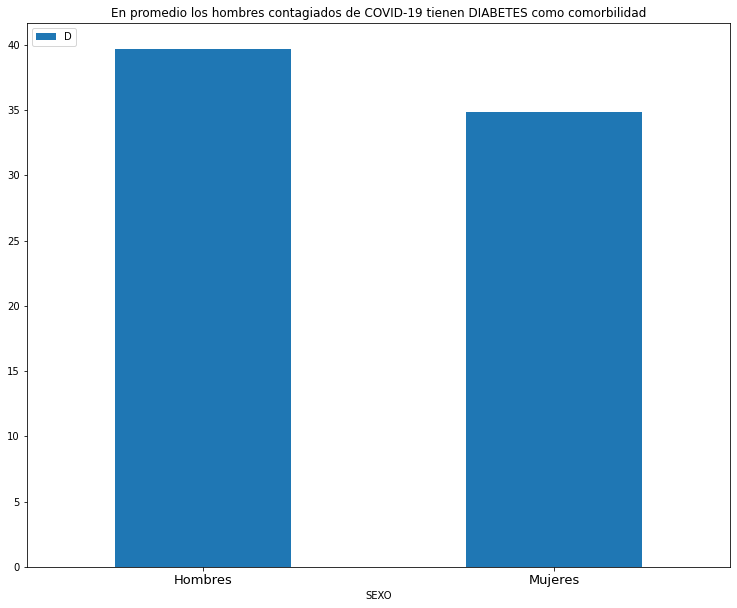

In [71]:
comorbi(data,column='DIABETES')

In [72]:
data.groupby(['CVE','Municipios','SEXO'])[['DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION',
                                'CARDIOVASCULAR', 'OBESIDAD', 'TABAQUISMO', 
                                               'RENAL_CRONICA']].agg('sum').sort_values(by='CVE')

DIABETES  EPOC  ASMA  INMUSUPR  \
CVE   Municipios             SEXO                                   
01001 Aguascalientes         1          183   187   186       188   
                             2          200   208   208       208   
01002 Asientos               1            2     2     2         2   
                             2            2     2     2         2   
01003 Calvillo               1           10    10    10        10   
...                                     ...   ...   ...       ...   
32051 Villa de Cos           1            3     4     4         4   
32053 Villa GonzÃ¡lez Ortega 2            2     2     2         2   
32055 Villanueva             1            2     2     2         2   
32056 Zacatecas              1           30    31    32        32   
                             2           34    34    34        34   

                                   HIPERTENSION  CARDIOVASCULAR  OBESIDAD  \
CVE   Municipios             SEXO                                           
01001 Aguascalientes         1              173             187       171   
                             2              194             207       198   
01002 Asientos               1                2               2         2   
                             2                2               2         2   
01003 Calvillo               1               10              10         9   
...                                         ...             ...       ...   
32051 Villa de Cos           1                3               4         3   
32053 Villa GonzÃ¡lez Ortega 2                2               2         2   
32055 Villanueva             1                2               2         2   
32056 Zacatecas              1               28              31        29   
                             2               32              34        33   

                                   TABAQUISMO  RENAL_CRONICA  
CVE   Municipios             SEXO                             
01001 Aguascalientes         1            185            187  
                             2            204            208  
01002 Asientos               1              2              2  
                             2              2              2  
01003 Calvillo               1             10             10  
...                                       ...            ...  
32051 Villa de Cos           1              4              4  
32053 Villa GonzÃ¡lez Ortega 2              2              2  
32055 Villanueva             1              2              2  
32056 Zacatecas              1             32             32  
                             2             33             33  

[1154 rows x 9 columns]

In [73]:
diabetes = mun_data['DIABETES']


In [74]:
diabetes=pd.DataFrame(diabetes)
diabetes

,,DIABETES
CVE,Municipios,
01001,Aguascalientes,383
01002,Asientos,4
01003,Calvillo,17
01004,CosÃ­o,4
01005,JesÃºs MarÃ­a,3
...,...,...
32050,Vetagrande,2
32051,Villa de Cos,3
32053,Villa GonzÃ¡lez Ortega,2


In [75]:
diabetes = diabetes.sort_values(by='DIABETES',ascending=False)



In [76]:
import plotly as py
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [77]:
diabetes['DIABETES'][:100].iplot(kind='bar', xTitle = 'Municipios', yTitle = 'Personas',
                 title = 'La CDMX tiene a muchos diabéticos contagiados de COVID-19',size=20)

In [231]:
tabaquismo = mun_data['TABAQUISMO']

In [233]:
tabaquismo = tabaquismo.sort_values(ascending=False)
tabaquismo


CVE    Municipios       
09007  Iztapalapa           62135
09005  Gustavo A. Madero    48226
09010  Ãlvaro ObregÃ³n     33488
09012  Tlalpan              26065
09011  TlÃ¡huac             23351
                            ...  
19003  Los Aldamas              1
23010  Bacalar                  1
05004  Arteaga                  1
08035  Janos                    1
24008  Cerritos                 1
Name: TABAQUISMO, Length: 1446, dtype: int64

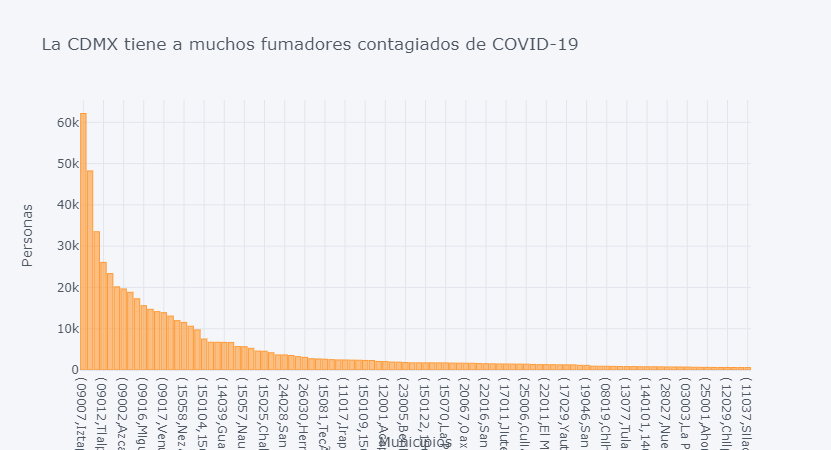

In [237]:
tabaquismo[:100].iplot(kind='bar', xTitle = 'Municipios', yTitle = 'Personas',
                 title = 'La CDMX tiene a muchos fumadores contagiados de COVID-19',size=20)

In [48]:
df.columns

Index(['nuevo_estado_1', 'FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN',
       'SECTOR', 'ENTIDAD_UM', 'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES',
       'MUNICIPIO_RES', 'TIPO_PACIENTE', 'FECHA_INGRESO', 'FECHA_SINTOMAS',
       'FECHA_DEF', 'INTUBADO', 'NEUMONIA', 'EDAD', 'NACIONALIDAD', 'EMBARAZO',
       'HABLA_LENGUA_INDIG', 'INDIGENA', 'DIABETES', 'EPOC', 'ASMA',
       'INMUSUPR', 'HIPERTENSION', 'OTRA_COM', 'CARDIOVASCULAR', 'OBESIDAD',
       'RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO', 'TOMA_MUESTRA_LAB',
       'RESULTADO_LAB', 'TOMA_MUESTRA_ANTIGENO', 'RESULTADO_ANTIGENO',
       'CLASIFICACION_FINAL', 'MIGRANTE', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN',
       'UCI', 'fecha_muerto', 'fecha_muerte', 'año', 'mes', 'dia', 'muerto',
       'Rango_Edad', 'nuevo_mun', 'CVE', 'Municipios', 'Estados'],
      dtype='object')

In [49]:
data_final = df[['SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES',
       'MUNICIPIO_RES', 'TIPO_PACIENTE', 'FECHA_INGRESO', 'FECHA_SINTOMAS',
       'FECHA_DEF', 'INTUBADO', 'NEUMONIA', 'EDAD', 'NACIONALIDAD', 'EMBARAZO',
       'HABLA_LENGUA_INDIG', 'INDIGENA', 'DIABETES', 'EPOC', 'ASMA',
       'INMUSUPR', 'HIPERTENSION', 'OTRA_COM', 'CARDIOVASCULAR', 'OBESIDAD',
       'RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO', 'TOMA_MUESTRA_LAB',
       'RESULTADO_LAB', 'TOMA_MUESTRA_ANTIGENO', 'RESULTADO_ANTIGENO',
       'CLASIFICACION_FINAL', 'MIGRANTE', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN',
       'UCI', 'fecha_muerto', 'fecha_muerte', 'año', 'mes', 'dia', 'muerto',
                 'CVE', 'Municipios', 'Estados','Rango_Edad']]

In [58]:
data_final['INTUBADO_']=np.where(data_final['INTUBADO']==1,1,np.where(data_final['INTUBADO']==2,2,0))
data_final

,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,...,fecha_muerte,año,mes,dia,muerto,CVE,Municipios,Estados,Rango_Edad,INTUBADO_
100166,1,1,1,1,1,2020-08-26,2020-08-21,9999-99-99,97,2,...,1900-01-01,1900,Enero,1,0,01001,Aguascalientes,Aguascalientes,"(40.0, 60.0]",0
214482,1,1,1,1,1,2020-10-09,2020-10-05,9999-99-99,97,2,...,1900-01-01,1900,Enero,1,0,01001,Aguascalientes,Aguascalientes,"(20.0, 40.0]",0
169920,1,1,1,1,2,2020-11-11,2020-11-06,9999-99-99,2,2,...,1900-01-01,1900,Enero,1,0,01001,Aguascalientes,Aguascalientes,"(0.0, 20.0]",2
63193,1,1,1,1,1,2020-12-09,2020-12-03,9999-99-99,97,2,...,1900-01-01,1900,Enero,1,0,01001,Aguascalientes,Aguascalientes,"(0.0, 20.0]",0
158428,2,21,1,1,1,2020-12-20,2020-12-17,9999-99-99,97,2,...,1900-01-01,1900,Enero,1,0,01001,Aguascalientes,Aguascalientes,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211000,2,32,32,57,2,2020-12-02,2020-11-19,9999-99-99,2,2,...,1900-01-01,1900,Enero,1,0,32057,Trancoso,Zacatecas,"(40.0, 60.0]",2
81136,2,32,32,57,1,2021-01-05,2021-01-01,9999-99-99,97,2,...,1900-01-01,1900,Enero,1,0,32057,Trancoso,Zacatecas,"(40.0, 60.0]",0
273919,1,32,32,57,1,2020-03-22,2020-03-19,9999-99-99,97,2,...,1900-01-01,1900,Enero,1,0,32057,Trancoso,Zacatecas,"(0.0, 20.0]",0
199503,2,32,32,58,2,2020-03-31,2020-03-31,2020-03-31,2,1,...,2020-03-31,2020,Marzo,31,1,32058,Santa MarÃ­a de la Paz,Zacatecas,"(60.0, 80.0]",2


In [50]:
data_final.sort_values(by='CVE',ascending=True,inplace=True)

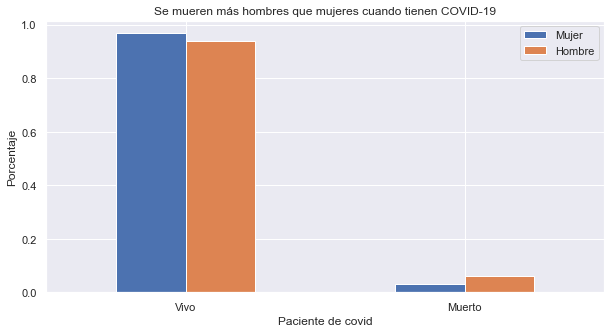

In [51]:
data_final.groupby('SEXO').muerto.value_counts(normalize=True).unstack(0).plot(kind='bar',figsize=(10,5))
plt.title('Se mueren más hombres que mujeres cuando tienen COVID-19')
plt.xticks(np.arange(2),['Vivo','Muerto'],rotation=0)
plt.xlabel('Paciente de covid')
plt.ylabel('Porcentaje')
plt.legend(['Mujer','Hombre'])
plt.grid(True)
plt.show();

In [59]:
df_dummies = pd.get_dummies(data_final, 
                            columns=['Estados','Rango_Edad'])

In [60]:
df_dummies.columns.tolist()

['SEXO',
 'ENTIDAD_NAC',
 'ENTIDAD_RES',
 'MUNICIPIO_RES',
 'TIPO_PACIENTE',
 'FECHA_INGRESO',
 'FECHA_SINTOMAS',
 'FECHA_DEF',
 'INTUBADO',
 'NEUMONIA',
 'EDAD',
 'NACIONALIDAD',
 'EMBARAZO',
 'HABLA_LENGUA_INDIG',
 'INDIGENA',
 'DIABETES',
 'EPOC',
 'ASMA',
 'INMUSUPR',
 'HIPERTENSION',
 'OTRA_COM',
 'CARDIOVASCULAR',
 'OBESIDAD',
 'RENAL_CRONICA',
 'TABAQUISMO',
 'OTRO_CASO',
 'TOMA_MUESTRA_LAB',
 'RESULTADO_LAB',
 'TOMA_MUESTRA_ANTIGENO',
 'RESULTADO_ANTIGENO',
 'CLASIFICACION_FINAL',
 'MIGRANTE',
 'PAIS_NACIONALIDAD',
 'PAIS_ORIGEN',
 'UCI',
 'fecha_muerto',
 'fecha_muerte',
 'año',
 'muerto',
 'CVE',
 'Municipios',
 'INTUBADO_',
 'Estados_Aguascalientes',
 'Estados_Baja California',
 'Estados_Baja California Sur',
 'Estados_Campeche',
 'Estados_Chiapas',
 'Estados_Chihuahua',
 'Estados_Ciudad de MÃ©xico',
 'Estados_Coahuila de Zaragoza',
 'Estados_Colima',
 'Estados_Durango',
 'Estados_Guanajuato',
 'Estados_Guerrero',
 'Estados_Hidalgo',
 'Estados_Jalisco',
 'Estados_MichoacÃ¡n 

In [99]:
not_x = ['CVE','Municipios', 'Estados','nuevo_estado_1','ENTIDAD_NAC',
 'ENTIDAD_RES',
 'MUNICIPIO_RES','fecha_muerto',
 'fecha_muerte',
 'año',
 'mes',
 'dia','FECHA_INGRESO',
 'FECHA_SINTOMAS',
 'FECHA_DEF','PAIS_NACIONALIDAD', 'PAIS_ORIGEN','muerto','EDAD',,'muerto']
x_cols = [x for x in df_dummies.columns if x not in not_x]


In [100]:
df_pre = df_dummies[x_cols + ['muerto'] ]

In [101]:
df_pre

,SEXO,TIPO_PACIENTE,INTUBADO,NEUMONIA,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,INDIGENA,DIABETES,EPOC,...,dia_23,dia_24,dia_25,dia_26,dia_27,dia_28,dia_29,dia_30,dia_31,muerto
100166,1,1,97,2,1,2,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0
214482,1,1,97,2,1,2,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0
169920,1,2,2,2,1,2,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0
63193,1,1,97,2,1,2,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0
158428,2,1,97,2,1,97,2,2,1,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211000,2,2,2,2,1,97,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0
81136,2,1,97,2,1,97,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0
273919,1,1,97,2,1,2,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0
199503,2,2,2,1,1,97,2,2,2,2,...,0,0,0,0,0,0,0,0,1,1


In [102]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (r2_score, roc_auc_score,
                            classification_report, confusion_matrix,
                            roc_curve, accuracy_score)

import scikitplot as skplt
plt.style.use('ggplot')
font = {'family' : 'sans','weight' : 'bold','size'   : 20}
plt.rc('font', **font)
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['figure.figsize'] = (16,8)
import shap
shap.initjs()


In [103]:
x_train, x_test, y_train,y_test = train_test_split(
    df_pre[x_cols], df_pre.muerto, test_size=0.2, random_state=69)

In [104]:
x_train.columns

Index(['SEXO', 'TIPO_PACIENTE', 'INTUBADO', 'NEUMONIA', 'NACIONALIDAD',
       'EMBARAZO', 'HABLA_LENGUA_INDIG', 'INDIGENA', 'DIABETES', 'EPOC',
       ...
       'dia_22', 'dia_23', 'dia_24', 'dia_25', 'dia_26', 'dia_27', 'dia_28',
       'dia_29', 'dia_30', 'dia_31'],
      dtype='object', length=107)

# Utilizando regresión logística

In [105]:
model = LogisticRegression()
model.fit(x_train, y_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression()

In [106]:
y_hat = model.predict(x_test)
y_hat_proba = model.predict_proba(x_test)

In [107]:
y_hat[:5]

array([0, 0, 0, 0, 0])

In [108]:
y_hat_proba[:5]

array([[9.99937005e-01, 6.29954866e-05],
       [8.80073841e-01, 1.19926159e-01],
       [9.99972151e-01, 2.78492049e-05],
       [9.99309546e-01, 6.90454442e-04],
       [9.99959985e-01, 4.00147628e-05]])

<AxesSubplot:>

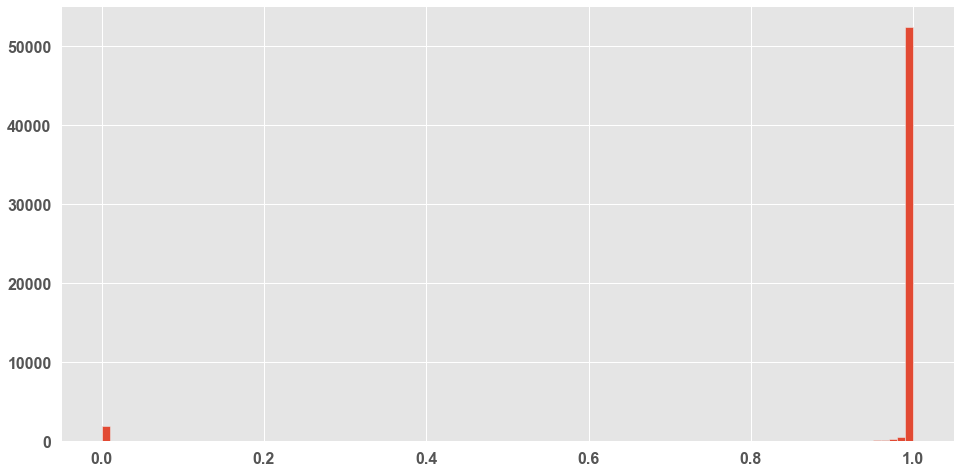

In [109]:
pd.DataFrame(y_hat_proba)[0].hist(bins=100)

In [110]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     53712
           1       0.99      0.98      0.98      2485

    accuracy                           1.00     56197
   macro avg       0.99      0.99      0.99     56197
weighted avg       1.00      1.00      1.00     56197



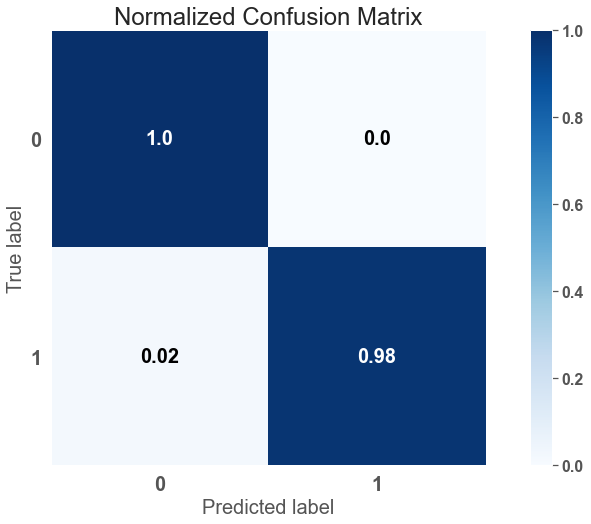

In [111]:
skplt.metrics.plot_confusion_matrix(
    y_test, y_hat, normalize=True);

In [112]:
df_pre.muerto.value_counts()

0    268152
1     12831
Name: muerto, dtype: int64

# Balanceo con undersample

In [113]:
# Class count
count_class_0, count_class_1 = y_train.value_counts()

# Majority class
x_data_majority = x_train.loc[y_train == 0]
y_data_majority = y_train.loc[y_train == 0]

# Minority class
x_data_minority = x_train.loc[y_train == 1]
y_data_minority = y_train.loc[y_train == 1]

###########################################

y_df_major_downsampled = y_data_majority.sample(n = count_class_1, random_state=69)
x_df_major_downsampled = x_data_majority.loc[y_df_major_downsampled.index]

y_data_downsampled = pd.concat([y_df_major_downsampled, y_data_minority])
x_data_downsampled = pd.concat([x_df_major_downsampled, x_data_minority])

y_data_downsampled.value_counts()

0    10346
1    10346
Name: muerto, dtype: int64

In [114]:
model_under = LogisticRegression()
model_under.fit(x_data_downsampled, y_data_downsampled)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression()

In [115]:
y_hat_under = model_under.predict(x_test)
y_hat_under_proba = model_under.predict_proba(x_test)

In [116]:
print(classification_report(y_test,y_hat_under))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     53712
           1       0.98      1.00      0.99      2485

    accuracy                           1.00     56197
   macro avg       0.99      1.00      0.99     56197
weighted avg       1.00      1.00      1.00     56197



<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

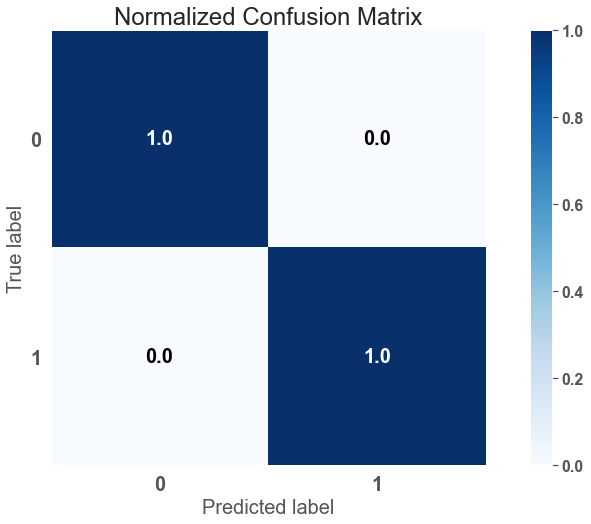

In [117]:
skplt.metrics.plot_confusion_matrix(y_test,y_hat_under, normalize=True)

In [118]:
coef = model_under.coef_
coefs = pd.DataFrame(index = x_data_downsampled.columns, data =coef[0,:].T,
                     columns=['coeficiente'])

<AxesSubplot:>

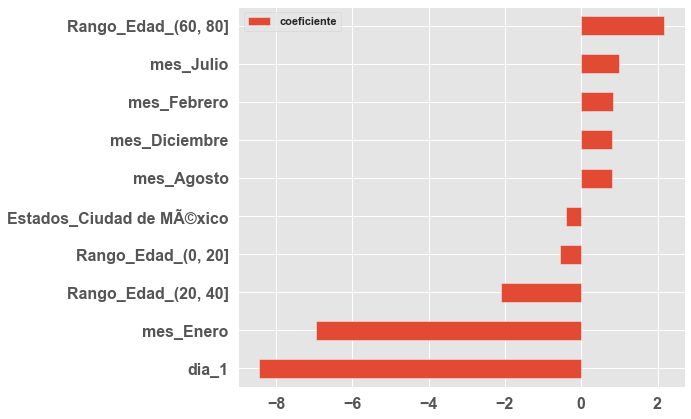

In [119]:
coefs=coefs.sort_values('coeficiente')
coefs2=pd.concat([coefs.head(),coefs.tail()],axis=0)
coefs2.plot.barh(figsize=(8,7))

In [120]:
explainer = shap.LinearExplainer(model_under, x_train, feature_perturbation="interventional")
shap_values = explainer.shap_values(x_test)


The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


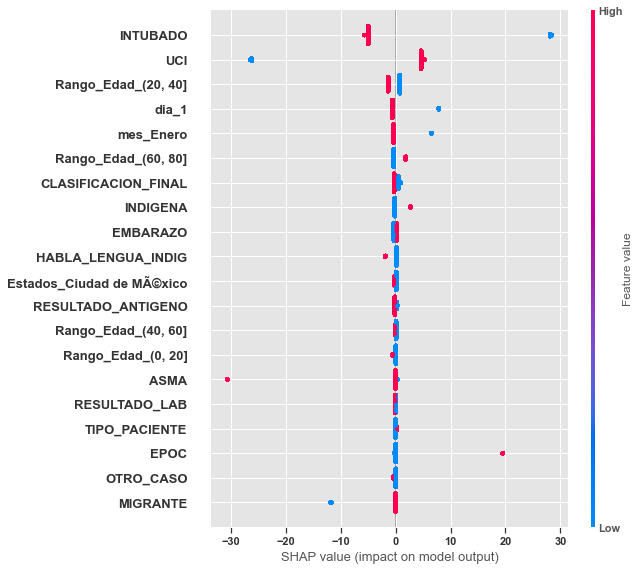

In [121]:
shap.summary_plot(shap_values, x_test)

# Utilizando máquinas de soporte vectorial

In [1]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state = 0)
classifier.fit(x_data_downsampled, y_data_downsampled)

NameError: name 'x_data_downsampled' is not defined

In [ ]:
#predicting result
Y_pred = classifier.predict(x_test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)

In [ ]:
sbn.heatmap(cm, annot=True, fmt='d')

# Usando un Random Forest

In [ ]:
#fitting the RANDOM FOREST to the training se
from sklearn.ensemble import RandomForestClassifier
#classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
classifier.fit(x_data_downsampled, y_data_downsampled)

In [ ]:
#predicting result
Y_pred = classifier.predict(x_test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)

In [ ]:
sbn.heatmap(cm, annot=True, fmt='d')

# Usando un XGBoost

In [ ]:
# Fitting XGBoost to the Training set
from xgboost import XGBClassifier
classifier = XGBClassifier(seed=82)
classifier.fit(x_data_downsampled, y_data_downsampled)

In [ ]:
# Predicting the Test set results
Y_pred = classifier.predict(x_test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)

In [ ]:
sbn.heatmap(cm, annot=True,fmt='d')

In [ ]:
print(classification_report(y_test, Y_pred))

# Estableciendo los parámetros del XGBoost

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
import xgboost as xgb

# TODO: Create the parameters list you wish to tune
parameters = { 'learning_rate' : [0.1],
               'n_estimators' : [40],
               'max_depth': [3],
               'min_child_weight': [3],
               'gamma':[0.4],
               'subsample' : [0.8],
               'colsample_bytree' : [0.8],
               'scale_pos_weight' : [1],
               'reg_alpha':[1e-5]
             }  

def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''

    y_pred = clf.predict(features)
    
    return f1_score(target, y_pred, pos_label='H'), sum(target == y_pred) / float(len(y_pred))


# TODO: Initialize the classifier
clf = xgb.XGBClassifier(seed=2)

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score,pos_label='H')

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf,
                        scoring=f1_scorer,
                        param_grid=parameters,
                        cv=5)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(x_data_downsampled, y_data_downsampled)

# Get the estimator
clf = grid_obj.best_estimator_
print(clf)

# Report the final F1 score for training and testing after parameter tuning
f1, acc = predict_labels(clf, x_train, y_train)
print( "F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1 , acc))
    
f1, acc = predict_labels(clf, x_test, y_test)
print("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1 , acc))
